# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [2]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

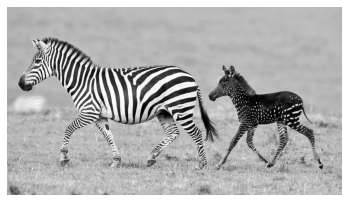

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

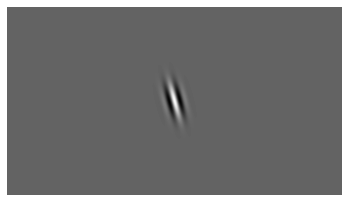

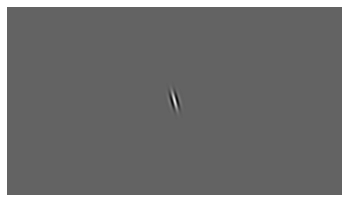

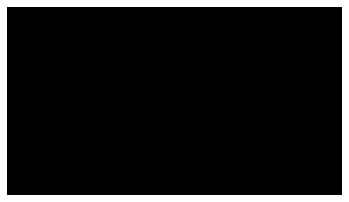

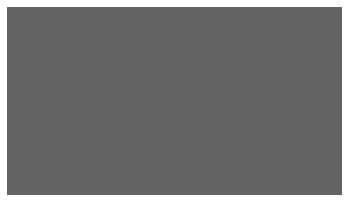

In [5]:
rig,col = zebra.shape

gabor = genGabor((col,rig),0.1,50)
myimshow(gabor)

gabor2 = genGabor((col,rig),0.2,50)
myimshow(gabor2)

gabor3 = genGabor((col,rig),0,10)
myimshow(gabor3)

gabor4 = genGabor((col,rig),1,180)
myimshow(gabor4)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

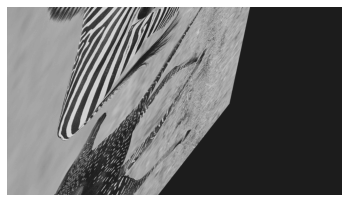

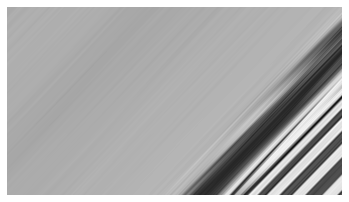

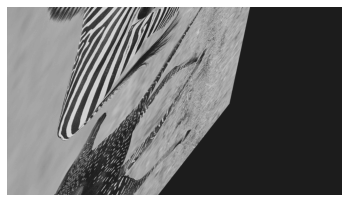

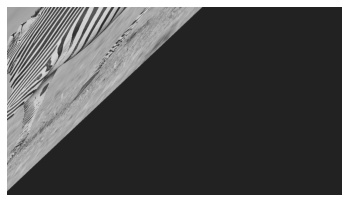

In [6]:
from scipy.ndimage import affine_transform

gabor = genGabor((3,3),1,70)
gabor2 = genGabor((3,3),0.3,70)

gabor3 = genGabor((3,3),1,70)
gabor4 = genGabor((3,3),1,100)

dst=affine_transform(zebra,gabor)
myimshow(dst)

dst2=affine_transform(zebra,gabor2)
myimshow(dst2)

dst3=affine_transform(zebra,gabor3)
myimshow(dst3)

dst4=affine_transform(zebra,gabor4)
myimshow(dst4)

QUESTO FILTRO SEMBRA ESEGUIRE UN0 CAMBIO DI SCALA ALLA VARIAZIONE DEL FATTORE OMEGA(PIÙ IL VALORE E'PICCOLO PIU'AUMENTA LA SCALA) ED ESEGUE UNA ROTAZIONE IN BASE ALL'ANGOLO THETA

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

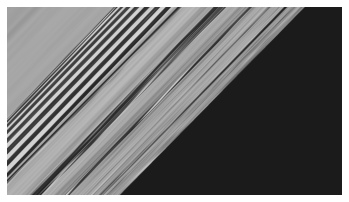

In [7]:
gabor = genGabor((3,3),1,300)
dst=affine_transform(zebra,gabor)
myimshow(dst)

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

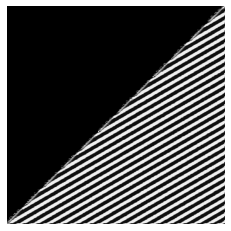

In [8]:
from scipy.ndimage import convolve
from scipy.ndimage.filters import gaussian_laplace
import cv2

gabor = cv2.imread("gabor1.jpg")
gabor_new = cv2.cvtColor(gabor,cv2.COLOR_BGR2GRAY)

log = gaussian_laplace(gabor_new,1)
myimshow(log)

IL FILTRO GAUSSIAN_LAPLACE PERMETTE DI IDENTIFICARE LE FORTI VARIAZIONI DI INTENSITÀ TRAMITE LA DERIVATA SECONDA PER INDIVIDUARE I CONTORNI DELL'IMMAGINE STESSA, SOBEL INVECE PERMETTE DI INDIVIDUARE LE VARIAZIONI INTERNE NELL'IMMAGINE.

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

CAMBIO DI BRIGHTNESS

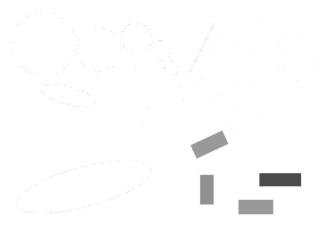

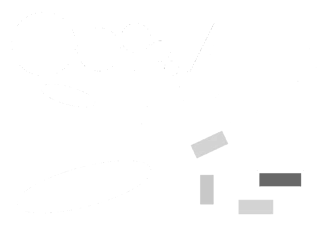

In [12]:
import cv2
from scipy.ndimage import gaussian_filter

ret = cv2.imread('rettangoli.jpg')
ret_gray = cv2.cvtColor(ret,cv2.COLOR_BGR2GRAY)

myimshow(ret_gray)
rig,col = ret_gray.shape
filt = np.full((rig,col),50)
ret_new = ret_gray + filt

ret_new = np.clip(ret_new,0,255)

myimshow(ret_new)

# Esercizio 3

Spiegare e mostrare con un esempio numerico i vantaggi e gli svantaggi di applicare un filtro 5x5 oppure due filtri 5x1 e 1x5 in sequenza. 

[[162 162 162 ... 185 185 185]
 [162 162 176 ... 185 185 186]
 [231 231 231 ... 185 186 186]
 ...
 [198 197 196 ... 244 243 242]
 [199 199 196 ... 244 243 242]
 [199 198 196 ... 244 243 242]]
[[ 57 112 112 ... 185 185 185]
 [162 162 176 ... 185 185 185]
 [232 232 243 ... 186 186 186]
 ...
 [198 198 196 ... 245 243 243]
 [198 198 196 ... 244 243 243]
 [199 199 197 ... 244 242 242]]


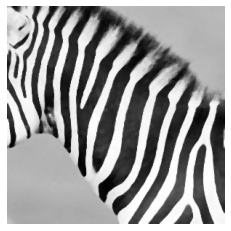

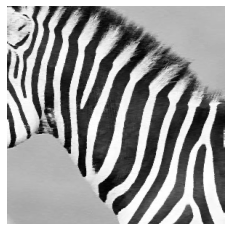

In [10]:
from scipy.ndimage import median_filter

zebra = cv2.cvtColor(cv2.imread('zebra.jpg'),cv2.COLOR_BGR2GRAY)
zebra_5x5 = median_filter(zebra[200:500,200:500],size=(5,5))

zebra_5x1 = median_filter(zebra[200:500,200:500], size = (5,1))
zebra_1x5 = median_filter(zebra[200:500,200:500], size  = (1,5))

myimshow(zebra_5x5)
myimshow(zebra_1x5)

print(zebra_5x5)
print(zebra_1x5)

Applicando il filtro mediano si nota sull'immagine della zebra (più precisamente la parte superiore) che l'immagine viene più offuscata mentre l'applicazione dei 2 filtri rende più definiti i peli della zebra. L'applicazione dei 2 filtri sembra marcare meglio le differenze di intensità nelle varie regioni.

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

[[108 112  87]
 [272 128  56]
 [382  94  36]
 [454 134  31]
 [488 184  22]]
(5, 3)


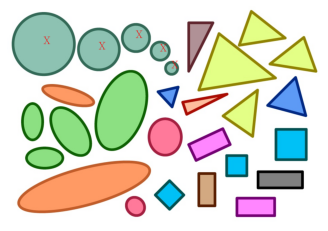

In [45]:
import skimage
img2 = cv2.imread('forme.jpg')
img_gray= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

forme_blur = cv2.GaussianBlur(img_gray, (5, 5), 7)

img = skimage.img_as_ubyte(forme_blur)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.8, minDist=20, param1=10, param2=100, minRadius=0, maxRadius=100)
circles = np.uint16(np.around(circles_float))

circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

forme_new = np.copy(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

for i in range(len(circles)):
    rad = circles[i,2]
    c = (circles[i,0],circles[i,1])
    cv2.putText(forme_new,text='X',org=c,fontFace = cv2.FONT_HERSHEY_COMPLEX,fontScale=1,color=(255,0,0))

myimshow(forme_new)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

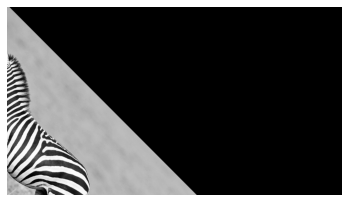

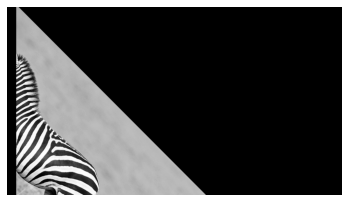

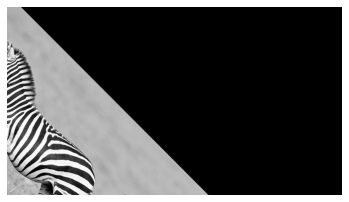

In [12]:
from scipy.ndimage import affine_transform
from scipy import linalg

img = cv2.imread('zebra.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

##DEFINISCO L'ANGOLO DI 45 GRADI IN RADIANTI

a = 45*np.pi/180

##CREO LA MATRICE DI ROTAZIONE
rotation = np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])

## CENTRO DI ROTAZIONE
center = np.array([5,5])

##CALCOLO DELL'OFFSET E APPLICAZIONE DELLA TRASFORMAZIONE DI WARPING
offset=(center-center.dot(rotation)).dot(linalg.inv(rotation))
dst = affine_transform(img_gray,rotation,order=2,offset=-offset)

myimshow(dst)

##DEFINIZIONE MATRICE DI SHIFT
shift_matrix = np.float32([ [1,0,50], [0,1,0] ])

rig,col = dst.shape

## APPLICAZIONE DELLA TRASFORMAZIONE
img_translation = cv2.warpAffine(dst, shift_matrix,dsize=(col,rig))

myimshow(img_translation)

## MATRICE TOTALE

M = np.array([[np.cos(a),-np.sin(a),50],[np.sin(a),np.cos(a),0]])

dst2=affine_transform(img_gray,M)

myimshow(dst2)